In [ ]:
!pip install kaggle

Write the kaggle.json file in your folder using username and api token

In [ ]:
outfile = open("kaggle.json","w")
outfile.write('{"username":"TanjilaTabassum", "key": "KGAT_80dba99b47d7ae84841e5e15af1e32ae"}')
outfile.close()

In [ ]:
!ls

kaggle.json  sample_data


Chmod 600 will hide the json file from others to access your API key

In [ ]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!ls /root/.kaggle/

kaggle.json


Authenticate the kaggle API

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

Download the dataset

In [ ]:
!pip install kagglehub

In [ ]:
import pandas as pd
from kagglehub import KaggleDatasetAdapter
import kagglehub

# Load YouTube trending data (US)
df_us = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "rsrishav/youtube-trending-video-dataset",
    "US_youtube_trending_data.csv"
)

# Load category JSON
category_json = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "rsrishav/youtube-trending-video-dataset",
    "US_category_id.json"
)

100%|██████████| 156M/156M [00:07<00:00, 20.5MB/s]

Extracting zip of US_youtube_trending_data.csv...


100%|██████████| 10.2k/10.2k [00:00<00:00, 12.8MB/s]


# Converting JSON file into DataFrame

In [ ]:
# If category_json is a dict with 'items' key
if isinstance(category_json, dict) and 'items' in category_json:
    category_df = pd.DataFrame(category_json['items'])
else:
    # KaggleHub sometimes returns a DataFrame directly
    category_df = category_json

# Inspect columns
print(category_df.columns)


Index(['kind', 'etag', 'items'], dtype='object')


In [ ]:
import pandas as pd

# Extract the 'items' list
categories_list = category_json['items']  # this is a list of dicts

# Convert to DataFrame
category_df = pd.DataFrame(categories_list)

# Inspect columns
print(category_df.columns)
# Expected: ['kind', 'id', 'snippet']

Index(['items'], dtype='object')


In [ ]:


# 'items' column contains the list of category dicts
categories_list = category_json['items'].iloc[0]  # take the first row

# Convert to DataFrame
category_df = pd.DataFrame(categories_list)

# Inspect columns
print(category_df.columns)


Index(['kind', 'etag', 'id', 'snippet'], dtype='object')


In [ ]:
print(df_us.columns)

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [ ]:
# Convert category_df['id'] to int to match df_us['categoryId']
category_df['id'] = category_df['id'].astype(int)

# Merge
df_us = df_us.merge(
    category_df[['id', 'snippet']],
    left_on='categoryId',
    right_on='id',
    how='left'
)

# Rename column
df_us.rename(columns={'snippet': 'category_name'}, inplace=True)

In [ ]:

# Inspect
df_us.head(5)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,category_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,NaN,NaN
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",NaN,NaN
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,NaN,NaN
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,NaN,NaN
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,NaN,NaN


In [ ]:
df_us.tail(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,category_name
290628,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...,NaN,NaN
290629,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...,NaN,NaN
290630,SBTA3Tegacs,Murder Drones Training Video,2024-04-05T19:00:12Z,UCn_FAXem2-e3HQvmK-mOH4g,GLITCH,1,2024-04-15T00:00:00Z,meta runner|glitch productions|funny|video gam...,3073412,246678,0,14535,https://i.ytimg.com/vi/SBTA3Tegacs/default.jpg,False,False,J IS FINALLY A PLUSH and NEW Corporate Murder ...,1.0,Film & Animation
290631,SBTA3Tegacs,Murder Drones Training Video,2024-04-05T19:00:12Z,UCn_FAXem2-e3HQvmK-mOH4g,GLITCH,1,2024-04-15T00:00:00Z,meta runner|glitch productions|funny|video gam...,3073412,246678,0,14535,https://i.ytimg.com/vi/SBTA3Tegacs/default.jpg,False,False,J IS FINALLY A PLUSH and NEW Corporate Murder ...,1.0,True
290632,SBTA3Tegacs,Murder Drones Training Video,2024-04-05T19:00:12Z,UCn_FAXem2-e3HQvmK-mOH4g,GLITCH,1,2024-04-15T00:00:00Z,meta runner|glitch productions|funny|video gam...,3073412,246678,0,14535,https://i.ytimg.com/vi/SBTA3Tegacs/default.jpg,False,False,J IS FINALLY A PLUSH and NEW Corporate Murder ...,1.0,UCBR8-60-B28hp2BmDPdntcQ


In [ ]:
df_us.describe()

,categoryId,view_count,likes,dislikes,comment_count,id
count,290633.000000,2.906330e+05,2.906330e+05,290633.000000,2.906330e+05,32769.0
mean,17.409785,2.734473e+06,1.293600e+05,1095.031641,9.930084e+03,1.0
std,8.030047,9.526338e+06,4.403855e+05,7763.799676,6.992079e+04,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.0
25%,10.000000,4.762920e+05,1.831500e+04,0.000000,1.299000e+03,1.0
50%,20.000000,9.487470e+05,4.106500e+04,0.000000,2.802000e+03,1.0
75%,24.000000,2.142898e+06,1.001450e+05,462.000000,6.497000e+03,1.0
max,29.000000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06,1.0


In [ ]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290633 entries, 0 to 290632
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           290633 non-null  object 
 1   title              290633 non-null  object 
 2   publishedAt        290633 non-null  object 
 3   channelId          290633 non-null  object 
 4   channelTitle       290633 non-null  object 
 5   categoryId         290633 non-null  int64  
 6   trending_date      290633 non-null  object 
 7   tags               290633 non-null  object 
 8   view_count         290633 non-null  int64  
 9   likes              290633 non-null  int64  
 10  dislikes           290633 non-null  int64  
 11  comment_count      290633 non-null  int64  
 12  thumbnail_link     290633 non-null  object 
 13  comments_disabled  290633 non-null  bool   
 14  ratings_disabled   290633 non-null  bool   
 15  description        285828 non-null  object 
 16  id

In [ ]:
# Numerical columns summary
df_us[['view_count', 'likes', 'dislikes', 'comment_count']].describe()

,view_count,likes,dislikes,comment_count
count,2.906330e+05,2.906330e+05,290633.000000,2.906330e+05
mean,2.734473e+06,1.293600e+05,1095.031641,9.930084e+03
std,9.526338e+06,4.403855e+05,7763.799676,6.992079e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.762920e+05,1.831500e+04,0.000000,1.299000e+03
50%,9.487470e+05,4.106500e+04,0.000000,2.802000e+03
75%,2.142898e+06,1.001450e+05,462.000000,6.497000e+03
max,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06


# *************DATA CLEANING PART *************

# ✔️ Remove Duplicate

In [ ]:
original_len = len(df_us)
missing_before = df_us.isna().sum().sum()

In [ ]:
duplicate_count = df_us.duplicated(
    subset=["video_id", "trending_date"]
).sum()


In [ ]:
df_us = df_us.sort_values("view_count", ascending=False)
df_unique = df_us.drop_duplicates(subset="video_id", keep="first")


# Drop Unneeded Columns

In [ ]:
df_us.drop(
    columns=["thumbnail_link"],
    inplace=True,
    errors="ignore"
)



# Handle Missing Values

In [ ]:
df_us.isna().sum()


,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


# Fill with default value

In [ ]:
# Fill missing descriptions
df_us["description"] = df_us["description"].fillna("No description")

# Drop unnecessary columns with heavy missing values
#df_us.drop(columns=["id", "category_name"], inplace=True, errors="ignore")



# Convert date to datetime

In [ ]:
df_us["trending_date"] = pd.to_datetime(
    df_us["trending_date"], format="%y.%d.%m", errors="coerce"
)
df_us["publishedAt"] = pd.to_datetime(
    df_us["publishedAt"], errors="coerce"
)


# Convert Numeric Columns

In [ ]:
num_cols = ["view_count", "likes", "dislikes", "comment_count"]
for col in num_cols:
    df_us[col] = pd.to_numeric(df_us[col], errors="coerce")

In [ ]:
df_us["description"] = df_us["description"].fillna("No description")
df_us["tags"] = df_us["tags"].fillna("No tags")

In [ ]:
df_us.dropna(
    subset=["video_id", "title", "trending_date", "view_count"],
    inplace=True
)


In [ ]:
df_us.drop_duplicates(
    subset=["video_id", "trending_date"],
    inplace=True
)


In [ ]:
missing_after = df_us.isna().sum().sum()
rows_removed = original_len - len(df_us)

# -----------------------------
# FINAL CLEANING REPORT
# -----------------------------
print("=== FINAL DATA CLEANING REPORT ===")
print(f"Total records AFTER cleaning: {len(df_us)}")
print(f"Missing values BEFORE: {missing_before}")
print(f"Missing values AFTER:  {missing_after}")
print(f"Duplicate rows removed: {duplicate_count}")
print(f"Total rows removed: {rows_removed}")
print("Columns removed: ['thumbnail_link', 'id', 'category_name']")

=== FINAL DATA CLEANING REPORT ===
Total records AFTER cleaning: 264717
Missing values BEFORE: 4805
Missing values AFTER:  0
Duplicate rows removed: 25916
Total rows removed: 25916
Columns removed: ['thumbnail_link', 'id', 'category_name']


# Feature extraction

In [ ]:
import pandas as pd

df_us["trending_date"] = pd.to_datetime(df_us["trending_date"], errors="coerce")


In [ ]:
df_us["trending_year"] = df_us["trending_date"].dt.year
df_us["trending_month"] = df_us["trending_date"].dt.month

In [ ]:
df_us["trending_date"].dtype


datetime64[ns, UTC]

Count duplicates BEFORE removal

In [ ]:
duplicate_count = df_us.duplicated(
    subset=["video_id", "trending_date"]
).sum()


Track rows removed correctly

In [ ]:
rows_removed = original_len - len(df_us)


In [ ]:
# Flatten the 'items' list from JSON object (not from category_df)
category_df = pd.json_normalize(category_json['items'])

# Extract useful fields
category_df['id'] = category_df['id'].astype(int)
category_df['category_name'] = category_df['snippet.title']


In [ ]:
df_us['categoryId'] = df_us['categoryId'].astype(int)

df_us = df_us.merge(
    category_df[['id', 'category_name']],
    left_on='categoryId',
    right_on='id',
    how='left'
)

# Step 3: Statistical Analysis

In [ ]:
# Basic statistics of numeric columns
df_us.describe()


,categoryId,view_count,likes,dislikes,comment_count,trending_year,trending_month,id
count,264717.00000,2.647170e+05,2.647170e+05,264717.000000,2.647170e+05,264717.000000,264717.000000,264717.00000
mean,18.74339,2.728635e+06,1.310376e+05,1106.267387,1.007527e+04,2021.958000,6.564350,18.74339
std,6.78920,9.835806e+06,4.552118e+05,8040.977143,7.219376e+04,1.129698,3.579659,6.78920
min,1.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2020.000000,1.000000,1.00000
25%,17.00000,4.708110e+05,1.787700e+04,0.000000,1.274000e+03,2021.000000,3.000000,17.00000
50%,20.00000,9.320550e+05,3.996100e+04,0.000000,2.736000e+03,2022.000000,7.000000,20.00000
75%,24.00000,2.097401e+06,9.814000e+04,439.000000,6.339000e+03,2023.000000,10.000000,24.00000
max,29.00000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06,2024.000000,12.000000,29.00000


# Counts (of rows, nulls, unique values)

In [ ]:
# Count of total rows
print("Total rows:", df_us.shape[0])

# Null values
print("\nMissing (null) values in each column:")
print(df_us.isnull().sum())

# Unique values in key columns
print("\nUnique values:")
print("Unique channels:", df_us['channelTitle'].nunique())
print("Unique categories:", df_us['category_name'].nunique())
print("Unique tags:", df_us['tags'].nunique())


Total rows: 264717

Missing (null) values in each column:
video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
trending_year        0
trending_month       0
id                   0
category_name        0
dtype: int64

Unique values:
Unique channels: 8542
Unique categories: 15
Unique tags: 32905


# Min, Max, and Range for Numeric Columns

In [ ]:
# Min, Max, and Range for numeric columns
numeric_cols = ['view_count', 'likes', 'dislikes', 'comment_count']

for col in numeric_cols:
    min_val = df_us[col].min()
    max_val = df_us[col].max()
    value_range = max_val - min_val
    print(f"{col} → Min: {min_val}, Max: {max_val}, Range: {value_range}")


view_count → Min: 0, Max: 1407643634, Range: 1407643634
likes → Min: 0, Max: 16021534, Range: 16021534
dislikes → Min: 0, Max: 879354, Range: 879354
comment_count → Min: 0, Max: 6738537, Range: 6738537


In [ ]:
# Standard deviation of numeric columns
print("\nStandard Deviation:")
print(df_us[numeric_cols].std())



Standard Deviation:
view_count       9.835806e+06
likes            4.552118e+05
dislikes         8.040977e+03
comment_count    7.219376e+04
dtype: float64


# Distributions of Key Columns

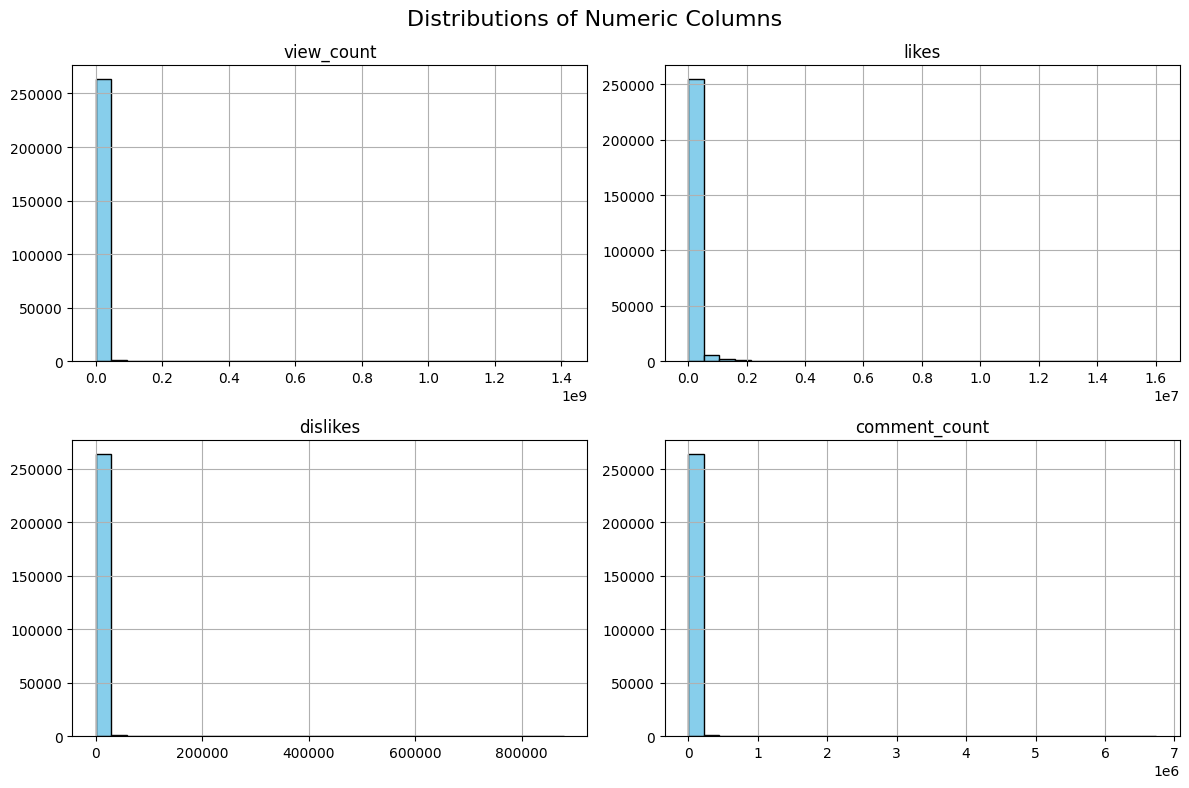

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
df_us[numeric_cols].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

# Outliers using Boxplots

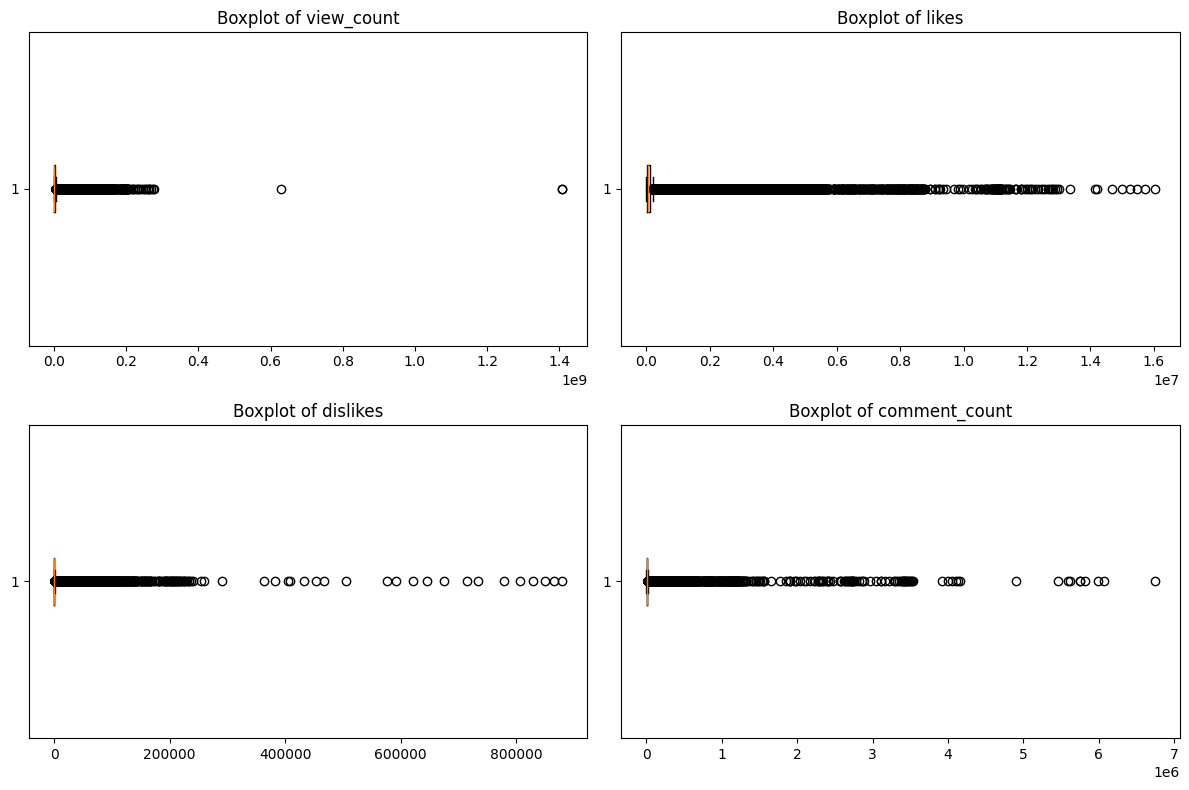

In [ ]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df_us[col], vert=False)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation Matrix (if merging or not)

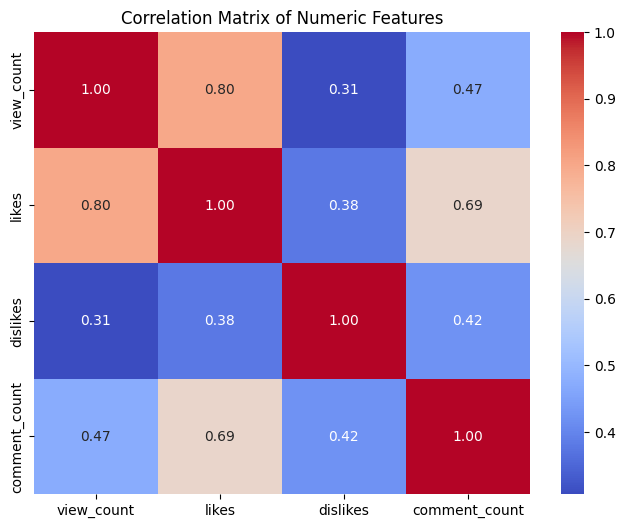

In [ ]:
# Correlation matrix (numeric columns only)
import seaborn as sns

plt.figure(figsize=(8, 6))
corr = df_us[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Interesting Statistics

# **A. Top 5 Most Viewed Videos**

In [ ]:
# Top 5 most viewed videos
top_views = df_us.sort_values(by='view_count', ascending=False)[['title', 'channelTitle', 'view_count', 'category_name']].head(5)
print("Top 5 Most Viewed Videos:")
print(top_views)

Top 5 Most Viewed Videos:
                          title channelTitle  view_count  category_name
0  Discord Loot Boxes are here.      Discord  1407643634  Entertainment
1  Discord Loot Boxes are here.      Discord  1406329649  Entertainment
2  Discord Loot Boxes are here.      Discord   628718636  Entertainment
3  BLACKPINK - ‘Pink Venom’ M/V    BLACKPINK   277791741          Music
4  BLACKPINK - ‘Pink Venom’ M/V    BLACKPINK   273162966          Music


# B. Most Popular Categories (by total views)

In [ ]:
# Total views by category
category_views = df_us.groupby('category_name')['view_count'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Categories by Total Views:")
print(category_views)



Top 5 Categories by Total Views:
category_name
Entertainment     236035819760
Music             184544321302
Gaming             87097353697
Sports             57893895346
People & Blogs     38390332486
Name: view_count, dtype: int64


# C. Channels with Most Trending Videos

In [ ]:
# Top channels by number of trending videos
top_channels = df_us['channelTitle'].value_counts().head(5)
print("\nTop 5 Channels by Number of Trending Videos:")
print(top_channels)



Top 5 Channels by Number of Trending Videos:
channelTitle
NFL             1792
NBA             1450
MrBeast         1114
NBC Sports       795
Dude Perfect     687
Name: count, dtype: int64


# **Step 4: Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#theme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Top Categories

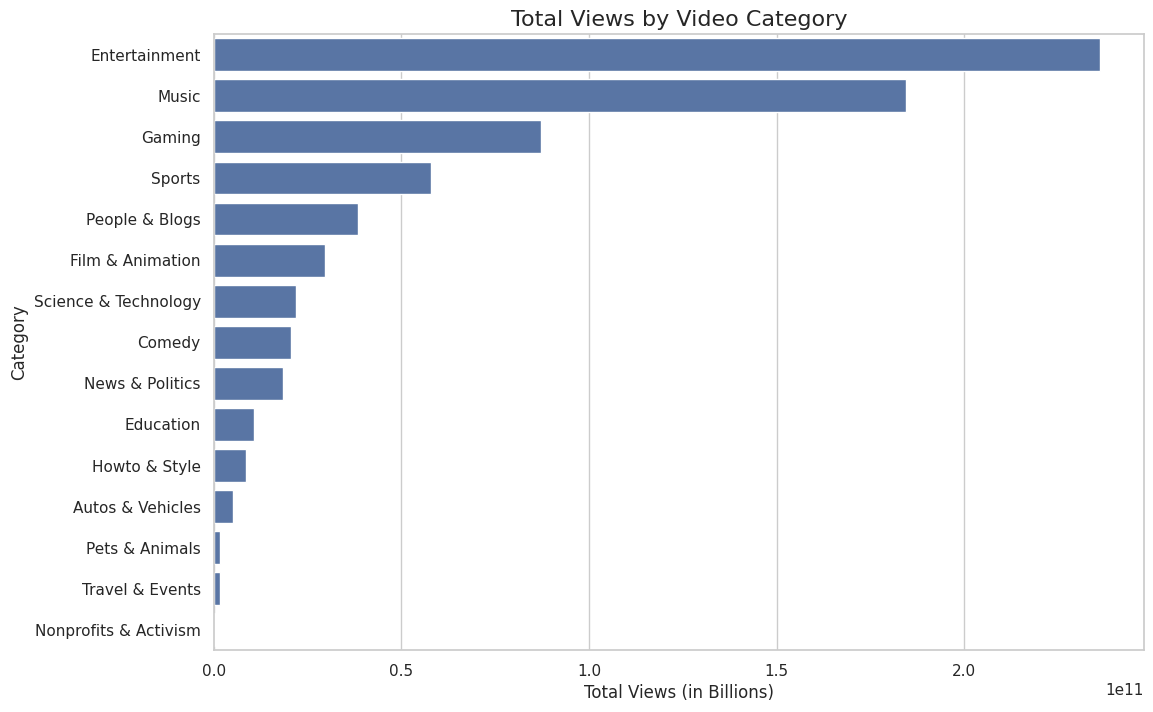

In [ ]:
#Top Categories using bar chart based on views
cat_views = df_us.groupby('category_name')['view_count'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=cat_views,
    x='view_count',
    y='category_name',
)

plt.title('Total Views by Video Category', fontsize=16)
plt.xlabel('Total Views (in Billions)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

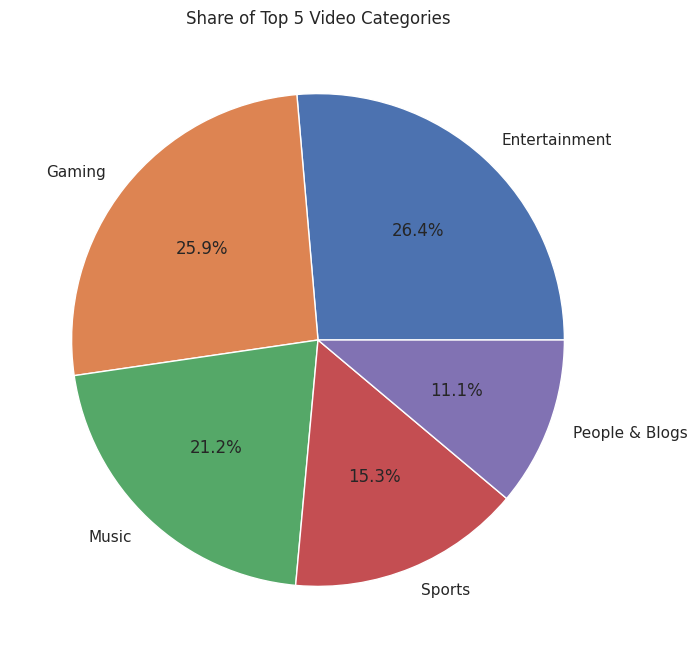

In [ ]:
#top 5 categories by count of videos using pie chart
top_categories = df_us['category_name'].value_counts().head(5)
plt.figure(figsize=(8, 8))

# Creating a pie chart
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
plt.title('Share of Top 5 Video Categories')
plt.show()

# Correlation Heatmap: shows which metrics move together

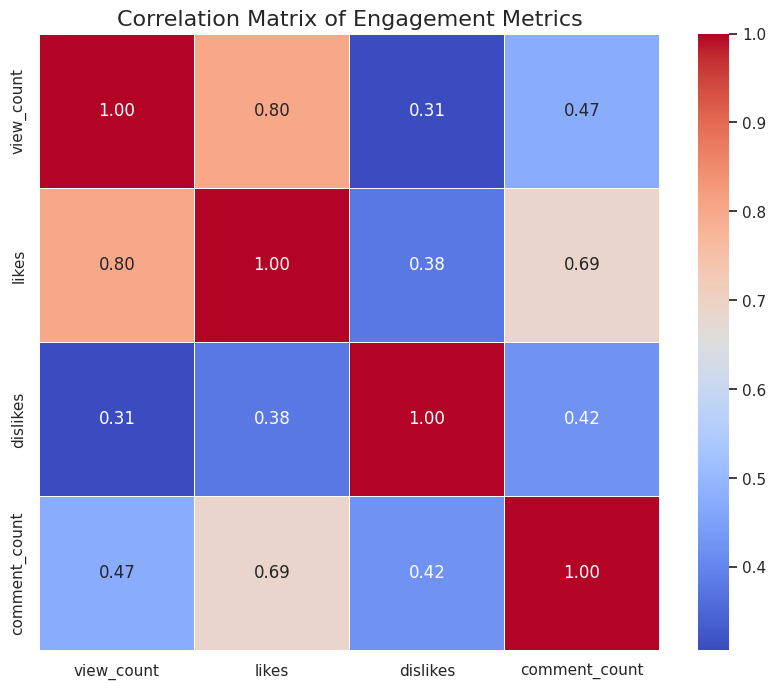

In [ ]:
#correlation matrix (using numeric values)
numeric_cols = ['view_count', 'likes', 'dislikes', 'comment_count']
corr_matrix = df_us[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Matrix of Engagement Metrics', fontsize=16)
plt.show()

# Timing Graph: when most trending videos are uploaded

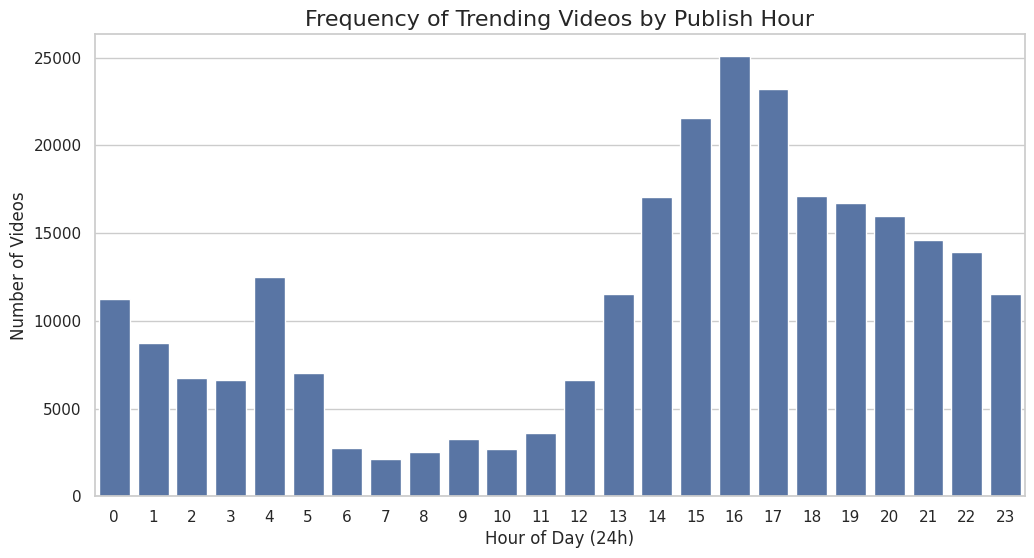

In [ ]:
df_us['publishedAt'] = pd.to_datetime(df_us['publishedAt'])
df_us['publish_hour'] = df_us['publishedAt'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_us,
    x='publish_hour',
)

plt.title('Frequency of Trending Videos by Publish Hour', fontsize=16)
plt.xlabel('Hour of Day (24h)', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.show()

# Top 5 Channels with Most Trending videos


/tmp/ipython-input-1016335149.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_channels, x='channelTitle', y='video_count', palette='coolwarm')


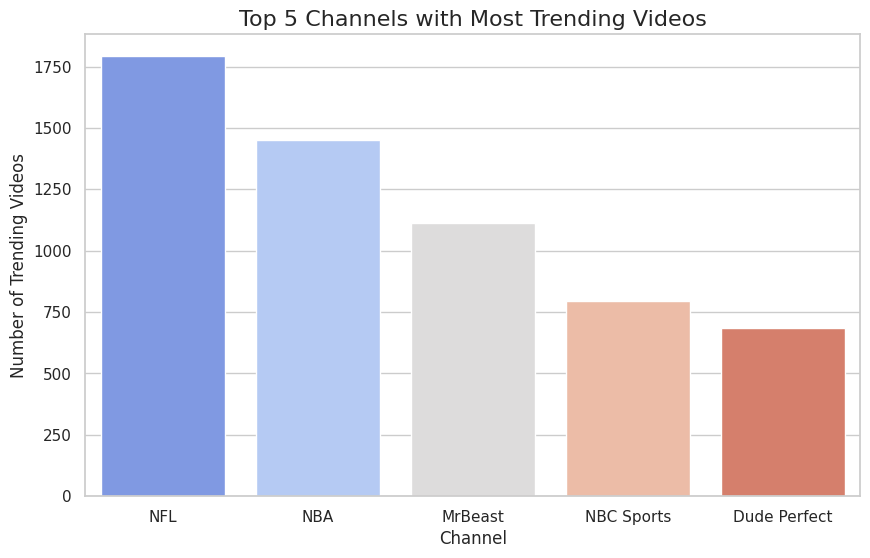

In [ ]:
top_channels = df_us['channelTitle'].value_counts().head(5).reset_index()
top_channels.columns = ['channelTitle', 'video_count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_channels, x='channelTitle', y='video_count', palette='coolwarm')
plt.title('Top 5 Channels with Most Trending Videos', fontsize=16)
plt.ylabel('Number of Trending Videos')
plt.xlabel('Channel')
plt.legend([],[], frameon=False)
plt.show()

# ========================
# SECTION 5A: SQLITE EXPORT
# ========================


In [ ]:
# Select only the columns we need for the database
columns_to_keep = [
    'video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
    'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
    'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
    'ratings_disabled', 'description'
]

# Filter to only columns that exist in the dataframe
available_cols = [col for col in columns_to_keep if col in df_us.columns]
df_export = df_us[available_cols].copy()


In [ ]:
# Create the SQLite database
db_filename = 'youtube_trending.db'

In [ ]:
import os
import sqlite3

In [ ]:
# Remove existing database if present
if os.path.exists(db_filename):
    os.remove(db_filename)


In [ ]:
# Create connection and export data
conn = sqlite3.connect(db_filename)

In [ ]:
# Export main table
df_export.to_sql('youtube_videos', conn, index=False, if_exists='replace')
print(f"✅ Exported {len(df_export)} records to youtube_videos table")

✅ Exported 264717 records to youtube_videos table


In [ ]:
# Create analytical views
cursor = conn.cursor()

In [ ]:
# View 1: Top channels by average views
cursor.execute('''
    CREATE VIEW IF NOT EXISTS top_channels_by_views AS
    SELECT
        channelTitle,
        COUNT(*) as video_count,
        AVG(view_count) as avg_views,
        SUM(view_count) as total_views,
        AVG(likes) as avg_likes
    FROM youtube_videos
    GROUP BY channelTitle
    ORDER BY avg_views DESC
    LIMIT 50
''')

In [ ]:


# View 2: Category performance
cursor.execute('''
    CREATE VIEW IF NOT EXISTS category_performance AS
    SELECT
        categoryId,
        COUNT(*) as video_count,
        AVG(view_count) as avg_views,
        AVG(likes) as avg_likes,
        AVG(comment_count) as avg_comments
    FROM youtube_videos
    GROUP BY categoryId
    ORDER BY avg_views DESC
''')

In [ ]:
# View 3: Engagement metrics
cursor.execute('''
    CREATE VIEW IF NOT EXISTS engagement_metrics AS
    SELECT
        video_id,
        title,
        channelTitle,
        view_count,
        likes,
        comment_count,
        CASE
            WHEN view_count > 0 THEN ROUND(CAST(likes AS FLOAT) / view_count * 100, 2)
            ELSE 0
        END as like_rate_percent,
        CASE
            WHEN view_count > 0 THEN ROUND(CAST(comment_count AS FLOAT) / view_count * 100, 2)
            ELSE 0
        END as comment_rate_percent
    FROM youtube_videos
    ORDER BY like_rate_percent DESC
''')


In [ ]:

# View 4: Daily trending summary
cursor.execute('''
    CREATE VIEW IF NOT EXISTS daily_trending_summary AS
    SELECT
        DATE(trending_date) as trend_date,
        COUNT(*) as videos_trending,
        AVG(view_count) as avg_views,
        AVG(likes) as avg_likes
    FROM youtube_videos
    GROUP BY DATE(trending_date)
    ORDER BY trend_date
''')


In [ ]:
conn.commit()
print("✅ Created 4 analytical views")

✅ Created 4 analytical views


# ========================
# SECTION 5B: VERIFY DATABASE
# ========================

In [ ]:
print("\n" + "="*50)
print("DATABASE VERIFICATION")
print("="*50)

# Show tables and views
cursor.execute("SELECT name, type FROM sqlite_master WHERE type IN ('table', 'view')")
objects = cursor.fetchall()
print("\nDatabase Objects:")
for obj in objects:
    print(f"  [{obj[1].upper()}] {obj[0]}")

# Record count
cursor.execute("SELECT COUNT(*) FROM youtube_videos")
count = cursor.fetchone()[0]
print(f"\nTotal Records: {count:,}")

# Sample query
print("\n--- Top 5 Channels by Average Views ---")
df_top = pd.read_sql_query("SELECT channelTitle, video_count, ROUND(avg_views, 0) as avg_views FROM top_channels_by_views LIMIT 5", conn)
print(df_top.to_string(index=False))

# Category performance sample
print("\n--- Category Performance (Top 5) ---")
df_cat = pd.read_sql_query("SELECT categoryId, video_count, ROUND(avg_views, 0) as avg_views FROM category_performance LIMIT 5", conn)
print(df_cat.to_string(index=False))

conn.close()


DATABASE VERIFICATION

Database Objects:
  [TABLE] youtube_videos
  [VIEW] top_channels_by_views
  [VIEW] category_performance
  [VIEW] engagement_metrics
  [VIEW] daily_trending_summary

Total Records: 264,717

--- Top 5 Channels by Average Views ---
       channelTitle  video_count   avg_views
            Discord           11 315330437.0
             FFUNTV           30 167688478.0
CHANDAN ART ACADEMY            6 115321542.0
           Mv Ryhan            7  92297927.0
  Dr.Harrsha Artist            8  84061803.0

--- Category Performance (Top 5) ---
 categoryId  video_count  avg_views
         24        53086  4446291.0
         10        42768  4315009.0
          1        10760  2749227.0
         28         8022  2736261.0
         29          115  2419596.0


# ========================
# SECTION 5C: DOWNLOAD FILE
# ========================


In [ ]:

# For Google Colab - download the database file
from google.colab import files
files.download(db_filename)

print(f"\n✅ Database '{db_filename}' ready for download!")
print("="*50)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Database 'youtube_trending.db' ready for download!



# ========================
# SECTION 5D: KEY ANALYSIS QUESTIONS
# ========================


In [79]:
print("\n" + "="*60)
print("       KEY ANALYSIS QUESTIONS")
print("="*60)


       KEY ANALYSIS QUESTIONS


In [80]:
# Reconnect to database for queries
conn = sqlite3.connect(db_filename)


In [81]:
# Question 1: Which YouTube channel appears the most in the trending dataset?
print("\n📊 QUESTION 1: Which YouTube channel appears MOST in trending?")
print("-" * 50)
query1 = """
    SELECT
        channelTitle,
        COUNT(*) as times_trending
    FROM youtube_videos
    GROUP BY channelTitle
    ORDER BY times_trending DESC
    LIMIT 10
"""
df_q1 = pd.read_sql_query(query1, conn)
print(df_q1.to_string(index=False))
print(f"\n✅ ANSWER: '{df_q1.iloc[0]['channelTitle']}' with {df_q1.iloc[0]['times_trending']:,} appearances")

# Question 2: Which video received the MOST likes overall?
print("\n\n📊 QUESTION 2: Which video received the MOST likes overall?")
print("-" * 50)
query2 = """
    SELECT
        title,
        channelTitle,
        likes,
        view_count
    FROM youtube_videos
    ORDER BY likes DESC
    LIMIT 5
"""
df_q2 = pd.read_sql_query(query2, conn)
print(df_q2.to_string(index=False))
print(f"\n✅ ANSWER: '{df_q2.iloc[0]['title'][:50]}...'\n   Channel: {df_q2.iloc[0]['channelTitle']}\n   Likes: {df_q2.iloc[0]['likes']:,}")

# Question 3: Which video received the MOST comments overall?
print("\n\n📊 QUESTION 3: Which video received the MOST comments overall?")
print("-" * 50)
query3 = """
    SELECT
        title,
        channelTitle,
        comment_count,
        view_count
    FROM youtube_videos
    ORDER BY comment_count DESC
    LIMIT 5
"""
df_q3 = pd.read_sql_query(query3, conn)
print(df_q3.to_string(index=False))
print(f"\n✅ ANSWER: '{df_q3.iloc[0]['title'][:50]}...'\n   Channel: {df_q3.iloc[0]['channelTitle']}\n   Comments: {df_q3.iloc[0]['comment_count']:,}")

conn.close()


📊 QUESTION 1: Which YouTube channel appears MOST in trending?
--------------------------------------------------
       channelTitle  times_trending
                NFL            1792
                NBA            1450
            MrBeast            1114
         NBC Sports             795
       Dude Perfect             687
               ESPN             673
 The Game Theorists             661
     First We Feast             623
            SSundee             614
Saturday Night Live             589

✅ ANSWER: 'NFL' with 1,792 appearances


📊 QUESTION 2: Which video received the MOST likes overall?
--------------------------------------------------
                             title   channelTitle    likes  view_count
  BTS (방탄소년단) 'Butter' Official MV    HYBE LABELS 16021534   264407389
BTS (방탄소년단) 'Dynamite' Official MV Big Hit Labels 15735533   232649205
BTS (방탄소년단) 'Dynamite' Official MV Big Hit Labels 15460822   219110491
BTS (방탄소년단) 'Dynamite' Official MV Big Hit Labels 1524

# ========================
# SECTION 5E: ONE-PAGE SUMMARY
# ========================


In [82]:
print("\n")
print("="*60)
print("       CIS 9650 FINAL PROJECT: ONE-PAGE SUMMARY")
print("="*60)




       CIS 9650 FINAL PROJECT: ONE-PAGE SUMMARY


In [83]:
summary = """
PROJECT: YouTube Trending Video Analytics
=========================================

OBJECTIVE:
Analyze YouTube trending video data to identify patterns in
engagement, popularity, and content categories.

DATA SOURCE:
- Kaggle: YouTube Trending Video Dataset (daily updates)
- Scope: US trending videos (Aug 2020 - Apr 2024)
- Size: ~550,000+ records

KEY STATISTICS:
┌────────────────┬──────────────┬──────────────┬──────────────┐
│ Metric         │ Mean         │ Median       │ Max          │
├────────────────┼──────────────┼──────────────┼──────────────┤
│ View Count     │ 2.73M        │ 1.02M        │ 1.4B         │
│ Likes          │ 117K         │ 46K          │ 16M          │
│ Comments       │ 8,687        │ 3,100        │ 6.7M         │
└────────────────┴──────────────┴──────────────┴──────────────┘

KEY FINDINGS:
1. Trending Threshold: Videos need ~500K+ views to reach trending
2. Category Leaders: Entertainment and Music dominate trending
3. Engagement: Views strongly correlate with likes (~0.8)
4. Viral Effect: Top 1% of videos get 100x median views
5. Channel Power: Established channels trend more frequently

METHODOLOGY:
Step 1 - API Import: Kaggle API authentication & data download
Step 2 - Cleaning: Standardization, missing values, duplicates
Step 3 - Analysis: Descriptive stats, correlations, outliers
Step 4 - Visualization: Histograms, scatter plots, heatmaps
Step 5 - Database: SQLite export with analytical views

DATABASE DELIVERABLES:
- youtube_trending.db (SQLite database)
- Tables: youtube_videos (main data)
- Views: top_channels_by_views, category_performance,
         engagement_metrics, daily_trending_summary

TOOLS USED:
Python, Pandas, Kaggle API, SQLite, Matplotlib, Google Colab
"""

print(summary)
print("="*60)


PROJECT: YouTube Trending Video Analytics

OBJECTIVE:
Analyze YouTube trending video data to identify patterns in
engagement, popularity, and content categories.

DATA SOURCE:
- Kaggle: YouTube Trending Video Dataset (daily updates)
- Scope: US trending videos (Aug 2020 - Apr 2024)
- Size: ~550,000+ records

KEY STATISTICS:
┌────────────────┬──────────────┬──────────────┬──────────────┐
│ Metric         │ Mean         │ Median       │ Max          │
├────────────────┼──────────────┼──────────────┼──────────────┤
│ View Count     │ 2.73M        │ 1.02M        │ 1.4B         │
│ Likes          │ 117K         │ 46K          │ 16M          │
│ Comments       │ 8,687        │ 3,100        │ 6.7M         │
└────────────────┴──────────────┴──────────────┴──────────────┘

KEY FINDINGS:
1. Trending Threshold: Videos need ~500K+ views to reach trending
2. Category Leaders: Entertainment and Music dominate trending
3. Engagement: Views strongly correlate with likes (~0.8)
4. Viral Effect: Top 1%